# Multiple Linear regression

## 1. การเตรียมข้อมูลก่อนทำการประมาณการ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
print(f'pandas  version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 0.24.2
seaborn version: 0.9.0


In [3]:
df=pd.read_csv('https://github.com/Siriratkant/Multiple-linear-regression/raw/master/kc_house_test_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
1,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
3,8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0,3,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
4,7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0,4,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080


In [4]:
df.shape

(4222, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 21 columns):
id               4222 non-null int64
date             4222 non-null object
price            4222 non-null float64
bedrooms         4222 non-null int64
bathrooms        4222 non-null float64
sqft_living      4222 non-null int64
sqft_lot         4222 non-null int64
floors           4222 non-null float64
waterfront       4222 non-null int64
view             4222 non-null int64
condition        4222 non-null int64
grade            4222 non-null int64
sqft_above       4222 non-null int64
sqft_basement    4222 non-null int64
yr_built         4222 non-null int64
yr_renovated     4222 non-null int64
zipcode          4222 non-null int64
lat              4222 non-null float64
long             4222 non-null float64
sqft_living15    4222 non-null int64
sqft_lot15       4222 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 692.8+ KB


**description**
* **id** - a notation for a house
* **date** - Date house was sold 
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot(ที่ดิน)
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront(ริมฝั่งแม่น้ำ)
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent.
* **grade** - overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement(ห้องใต้ดิน) 
* **yr_built** - Bulit year
* **yr_ renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** Longitude coordinate
* **sqft_living15** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* **sqft_lot15** lotSize area in 2015 (implies--some renovations)

In [7]:
df2=df.drop(['id', 'date',  'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_living15', 'sqft_lot15' , 'lat' ], axis=1)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
0,310000.0,3,1.0,1430,19901,1.5,0,0,7,1430,0
1,650000.0,4,3.0,2950,5000,2.0,0,3,9,1980,970
2,233000.0,3,2.0,1710,4697,1.5,0,0,6,1710,0
3,580500.0,3,2.5,2320,3980,2.0,0,0,8,2320,0
4,535000.0,3,1.0,1090,3000,1.5,0,0,8,1090,0


In [8]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement'],
      dtype='object')

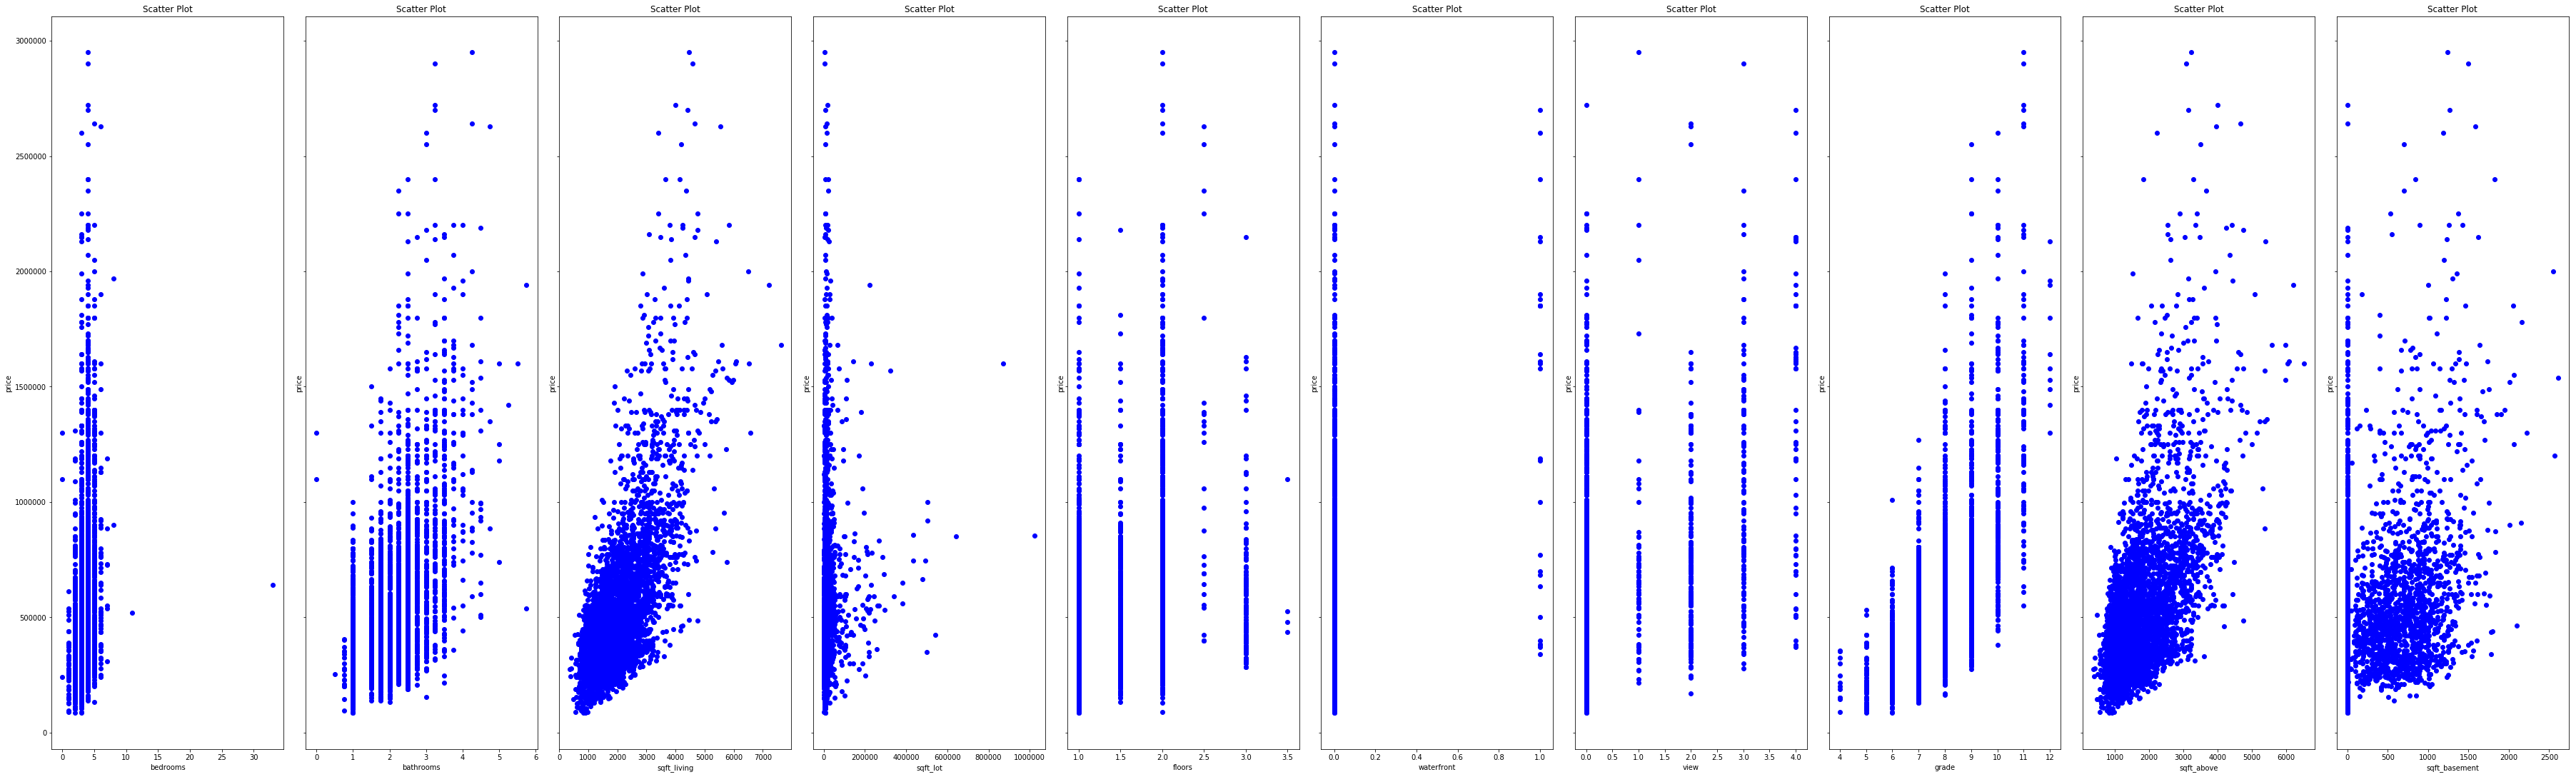

In [9]:
df3 = df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement']] 
Y =df2['price'] 
fig, axes = plt.subplots(1,len(df3.columns.values),sharey=True,constrained_layout=True,figsize=(50,15))
for i,e in enumerate(df3.columns): 
    axes[i].set_title("Scatter Plot") 
    axes[i].set_xlabel(str(e))  
    axes[i].set_ylabel('price') 
    axes[i].scatter(df3[e], Y,color='b') 

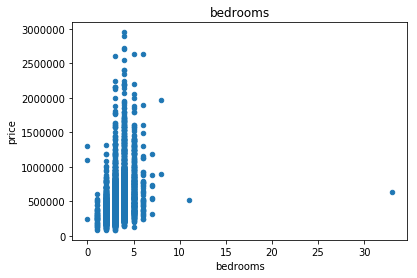

In [10]:
df2.plot.scatter(x='bedrooms', y='price',title='bedrooms')

In [11]:
df2.nlargest(2, columns = 'bedrooms')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
3095,640000.0,33,1.75,1620,6000,1.0,0,0,7,1040,580
1707,520000.0,11,3.00,3000,4960,2.0,0,0,7,2400,600


In [12]:
df2.drop([3095],inplace = True)

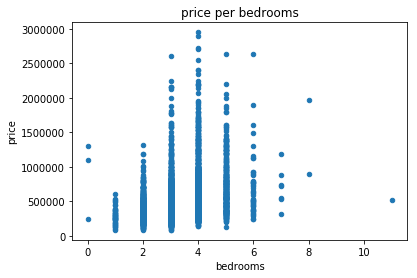

In [13]:
df2.plot.scatter(x='bedrooms', y='price',title='price per bedrooms')

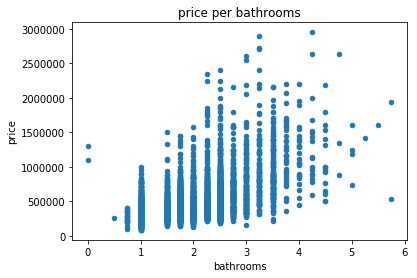

In [14]:
df2.plot.scatter(x='bathrooms', y='price',title='price per bathrooms') 

In [15]:
df2.bathrooms.value_counts()

2.50    1051
1.00     730
1.75     630
2.25     391
2.00     357
1.50     296
2.75     235
3.00     152
3.50     146
3.25     106
3.75      36
4.00      24
0.75      20
4.25      17
4.50      16
5.00       4
4.75       3
0.00       2
5.75       2
0.50       1
5.50       1
5.25       1
Name: bathrooms, dtype: int64

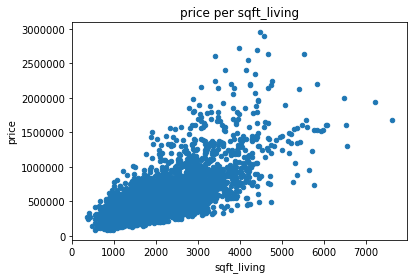

In [16]:
df2.plot.scatter(x='sqft_living', y='price',title='price per sqft_living')

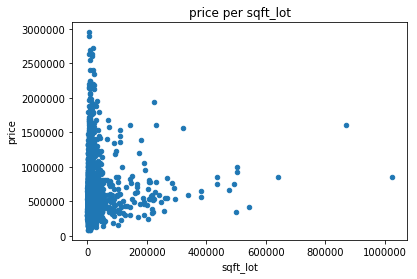

In [17]:
df2.plot.scatter(x='sqft_lot', y='price',title='price per sqft_lot')

In [18]:
df2.nlargest(2, columns = 'sqft_lot')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement
1512,855000.0,4,3.5,4030,1024068,2.0,0,0,10,4030,0
4015,1600000.0,4,5.5,6530,871200,2.0,0,2,11,6530,0


In [19]:
df2.drop([1512,4015],inplace = True)

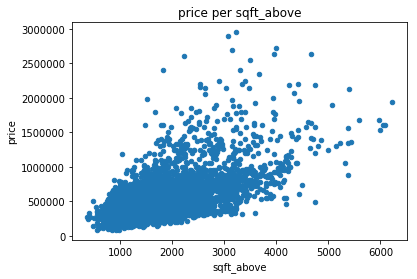

In [20]:
df2.plot.scatter(x='sqft_above', y='price',title='price per sqft_above')

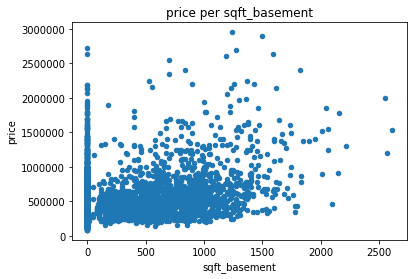

In [21]:
df2.plot.scatter(x='sqft_basement', y='price',title='price per sqft_basement')

#### แปลง ข้อมูล category ให้อยู่ในรูปของ dummy variable

In [22]:
a = pd.get_dummies(df2['bedrooms'], prefix = "bedrooms")
b = pd.get_dummies(df2['bathrooms'], prefix = "bathrooms")
c = pd.get_dummies(df2['floors'], prefix = "floors")
d = pd.get_dummies(df2['waterfront'],prefix = "waterfront")
e = pd.get_dummies(df2['view'],prefix ='view')
f = pd.get_dummies(df2['grade'],prefix ='grade')

In [23]:
frames = [df2, a, b, c,d,e,f]
df2 = pd.concat(frames, axis = 1)
pd.set_option('display.max_columns', None)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,bedrooms_0,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_11,bathrooms_0.0,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.75,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,310000.0,3,1.0,1430,19901,1.5,0,0,7,1430,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,650000.0,4,3.0,2950,5000,2.0,0,3,9,1980,970,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,233000.0,3,2.0,1710,4697,1.5,0,0,6,1710,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,580500.0,3,2.5,2320,3980,2.0,0,0,8,2320,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,535000.0,3,1.0,1090,3000,1.5,0,0,8,1090,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [24]:
df2.shape

(4219, 64)

In [25]:
df2 = df2.drop(columns = ['bedrooms','bathrooms','floors', 'view', 'waterfront','grade','bedrooms_0','bathrooms_0.0','floors_1.0','view_0','grade_4','waterfront_0'])
df2.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_11,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.75,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,310000.0,1430,19901,1430,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,650000.0,2950,5000,1980,970,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,233000.0,1710,4697,1710,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,580500.0,2320,3980,2320,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,535000.0,1090,3000,1090,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [26]:
df2.shape

(4219, 52)

## 2. Split ข้อมูลเป็น training set และ testing set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df2.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_11',
       'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.5',
       'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5',
       'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5',
       'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.75',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12'],
      dtype='object')

In [29]:
x=df2[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_11',
       'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.5',
       'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5',
       'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5',
       'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5',
       'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.75',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12']]
y=df2['price']

In [30]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.3,random_state = 7)

In [31]:
x_train.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_11,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.75,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
602,2150,12028,2150,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3786,3650,5328,2330,1320,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2554,2150,9820,1220,930,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1389,1460,8400,1460,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1463,1720,4006,1720,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 3. Sklearn: Multiple linear regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
model.score(x_train, y_train) 

0.6378011676748369

In [35]:
model.intercept_

219248.94952781487

In [36]:
model.coef_

array([ 1.03096759e+02, -3.72907711e-01,  2.36509951e+01,  7.94457637e+01,
        1.58391072e+05,  1.37406327e+05,  9.43546121e+04,  8.66917469e+04,
        9.04077672e+04,  4.04585447e+04, -3.90742498e+04,  3.67974096e+04,
        9.80807327e+03, -1.60071068e-09, -1.95767414e+05, -1.41564897e+05,
       -1.57588954e+05, -1.48954268e+05, -1.33836224e+05, -1.47493294e+05,
       -2.13056816e+05, -1.76261190e+05, -1.27435969e+05, -9.95475010e+04,
       -1.45808370e+05,  4.26591540e+04, -6.95736065e+04,  5.10277307e+04,
       -1.83573398e+05,  4.91818667e+04, -4.62583738e+05, -2.25157096e+05,
       -2.92998953e+05,  1.04353977e+05,  4.62151608e+03,  2.61943846e+05,
        6.11804884e+04,  1.28581396e+05,  3.11495267e+05,  9.79568624e+04,
        8.15492090e+04,  1.98609257e+05,  2.65261935e+05, -1.17146701e+05,
       -6.42162828e+04,  1.88692922e+03,  9.46505990e+04,  2.20770035e+05,
        3.44838637e+05,  5.36339926e+05,  7.59072166e+05])

In [37]:
y_hat=model.predict(x_test)
y_hat

array([325146.51971551, 346462.16417121, 637502.76853227, ...,
       569467.90597205, 395906.6198623 , 558452.59638393])

In [38]:
test=pd.concat([x_test, y_test], axis='columns')
test.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_11,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.75,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,price
3565,870,5635,870,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,334850.0
2254,1975,8734,1975,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,311000.0
2109,2480,7428,2480,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,729000.0
578,3590,6402,3590,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,798000.0
370,1180,6552,1180,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,275000.0


In [39]:
dt=pd.concat([test.reset_index(), pd.Series(y_hat, name='predicted')], axis='columns').round(2)
dt.head()

,index,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_11,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.75,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,price,predicted
0,3565,870,5635,870,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,334850.0,325146.52
1,2254,1975,8734,1975,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,311000.0,346462.16
2,2109,2480,7428,2480,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,729000.0,637502.77
3,578,3590,6402,3590,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,798000.0,969892.43
4,370,1180,6552,1180,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,275000.0,297993.16


In [40]:
model.score(x_test,y_test)

0.6064863398567163

In [41]:
dt.to_csv('C:\\Users\\LENOVO\\Desktop\\ML2\\Multiple linear regression final\\Multiple linear regression.csv')

## 3. Statsmodels: Multiple linear regression

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [43]:
df2.rename(columns = {'floors_1.5' : 'floors1_5', 'floors_2.0' : 'floors2','floors_2.5' : 'floors2_5','floors_3.0' : 'floors3','floors_3.5' : 'floors3_5','bathrooms_0.5':'bathrooms0_5', 'bathrooms_0.75':'bathrooms0_7_5', 'bathrooms_1.0':'bathrooms1_0',
       'bathrooms_1.5':'bathrooms1_5','bathrooms_1.75':'bathrooms1_7_5', 'bathrooms_2.0':'bathrooms2_0', 'bathrooms_2.25':'bathrooms2_2_5',
       'bathrooms_2.5':'bathrooms2_5', 'bathrooms_2.75':'bathrooms2_7_5', 'bathrooms_3.0':'bathrooms3_0', 'bathrooms_3.25':'bathrooms3_2_5',
       'bathrooms_3.5':'bathrooms3_5', 'bathrooms_3.75':'bathrooms3_7_5', 'bathrooms_4.0':'bathrooms4_0', 'bathrooms_4.25':'bathrooms4_2_5',
       'bathrooms_4.5':'bathrooms4_5', 'bathrooms_4.75':'bathrooms4_7_5', 'bathrooms_5.0':'bathrooms5', 'bathrooms_5.25':'bathrooms5_2_5',
       'bathrooms_5.75':'bathrooms5_7_5'}, inplace =True)
df2.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_11,bathrooms0_5,bathrooms0_7_5,bathrooms1_0,bathrooms1_5,bathrooms1_7_5,bathrooms2_0,bathrooms2_2_5,bathrooms2_5,bathrooms2_7_5,bathrooms3_0,bathrooms3_2_5,bathrooms3_5,bathrooms3_7_5,bathrooms4_0,bathrooms4_2_5,bathrooms4_5,bathrooms4_7_5,bathrooms5,bathrooms5_2_5,bathrooms5_7_5,floors1_5,floors2,floors2_5,floors3,floors3_5,waterfront_1,view_1,view_2,view_3,view_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,310000.0,1430,19901,1430,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,650000.0,2950,5000,1980,970,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,233000.0,1710,4697,1710,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,580500.0,2320,3980,2320,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,535000.0,1090,3000,1090,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [45]:
df2.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_11', 'bathrooms0_5',
       'bathrooms0_7_5', 'bathrooms1_0', 'bathrooms1_5', 'bathrooms1_7_5',
       'bathrooms2_0', 'bathrooms2_2_5', 'bathrooms2_5', 'bathrooms2_7_5',
       'bathrooms3_0', 'bathrooms3_2_5', 'bathrooms3_5', 'bathrooms3_7_5',
       'bathrooms4_0', 'bathrooms4_2_5', 'bathrooms4_5', 'bathrooms4_7_5',
       'bathrooms5', 'bathrooms5_2_5', 'bathrooms5_7_5', 'floors1_5',
       'floors2', 'floors2_5', 'floors3', 'floors3_5', 'waterfront_1',
       'view_1', 'view_2', 'view_3', 'view_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'],
      dtype='object')

In [46]:
model_a = smf.ols(formula='price~ +sqft_living + sqft_lot+sqft_above+sqft_basement+bedrooms_1+bedrooms_2+bedrooms_3+bedrooms_4+bedrooms_5+bedrooms_6+bedrooms_7+bedrooms_8 +bedrooms_11+bathrooms0_5+bathrooms0_7_5+bathrooms1_0+bathrooms1_5+bathrooms1_7_5+bathrooms2_0+bathrooms2_2_5+bathrooms2_5+bathrooms2_7_5+bathrooms3_0+bathrooms3_2_5+bathrooms3_5 +bathrooms3_7_5+bathrooms4_0+bathrooms4_2_5+bathrooms4_5+bathrooms4_7_5+bathrooms5+bathrooms5_2_5+bathrooms5_7_5+floors1_5+floors2+floors2_5+floors3+floors3_5+waterfront_1+view_1+view_2+view_3+view_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12',data = df2).fit()

In [47]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        14:30:07   Log-Likelihood:                -57435.
No. Observations:                4219   AIC:                         1.150e+05
Df Residuals:                    4168   BIC:                         1.153e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.237e+05    1.7e+05      1.

## 4.การตีความโดยใช้หลักทางสถิติ

ในขั้นตอนสุดท้ายเราจะมาดูว่า สมการที่เราใช้ประมารการนั้นมีความแม่นยำกับข้อมูลของเราหรือไม่ ซึ่งเราสามารถดูจากตารางสถิตินี้ได้ ซึ่งตัวหลักๆที่เราต้องดูมีดังนี้

* **1. R-squared** เป็นค่าที่ใช้บ่งบอกว่า สมการและตัวแปรอิสระทั้งหมด 10 ตัวที่เราใช้  สามารถใช้อธิบายการเปลี่ยนแปลงในตัวแปร Y ได้มากน้อยแค่ไหน ทั้งนี้การที่ข้อมูลของเราได้ค่า R-squared = 0.595 ถือว่ากลางๆ (ค่ายิ่งสูงยิ่งดี โดยค่า R- squared จะอยู่ระหว่าง 0<R<1 ) สาเหตุที่ทำให้ได้ค่านี้อาจจะเป็นเพราะว่า อาจจะมีตัวแปรอิสระบางตัวที่ไม่ได้มีความสัมพันธ์กับ Y หรืออาจจะมีความสัมพันธ์กับ Y แบบที่ไม่ใช่เส้นตรง 

* **2. Adjust. R - squared** เป็นการดูว่า model ที่เราใช้เหมาะสมกับข้อมูลจริง หรือเป็นเพราะตัวแปร x ที่เพิ่มขึ้น จึงทำให้ค่า R-squared นั้นสูง(โดยปกติแล้ว ค่า R-squared จะมีค่าสูงขึ้นหรือเท่าเดิม เมื่อมีตัวแปร x หรือตัวแปรอิสระเพิ่มขึ้น แต่ค่า Adj.R-squaresd จะเพิ่มขึ้นก็ต่อเมื่อตัวแปรอิสระที่เพิ่มเข้ามานั้นอธิบายตัวแปร Y ได้ดีขึ้น)    
ดังนั้น วิธีการของ Adj. R-squared คือ การนำตัวแปรอิสระ x ออก 1 ตัว แล้วทำการประมาณค่าอีกรอบ หากค่า  Adj.R-squared  มีค่าต่างจาก R-squared มากๆ อาจจะเป็นไปได้ว่า เราใส่ตัวแปรที่สามารถอธิบายการเปลี่ยนแปลง Y น้อย หรืออาจจะไม่สามารถอิธบายการเปลี่ยนแปลงของ Y ได้เลย คือประมาณว่าเราใส่ตัวแปรเกินจำเป็นนั่นเอง

* **F-statistic** เป็นค่าที่จะนำไปทดสอบสมมติฐาน ซึ่งหากผลออกมาว่า significant (significat คือการที่ค่า F-statistic เมื่อนำไปคำนวณแล้วค่า F ที่ได้ *มากกว่า* ค่า F-statistic ณ ระดับนัยสำคัญที่เรากำหนด ในที่นี้เรากำหนดไว้ที่ 0.05 ซึ่งเป็นที่นิยมโดยทั่วไป) **แสดงว่า มี x อย่างน้อย 1 ตัวที่มีความสัมพันธ์กับ Y** ยิ่ง F-statistic มีค่าสูง>>มีโอกาส significant มากค่าสูง>>มีโอกาส significant มาก

* **Prob(F-statistic)** เป็นค่า probability ของ F-statistic  หากเราไม่ต้องการคำนวณค่า F-statistic แล้วนำไปเทียบกับค่า F-statistic ณ ระดับนัยสำคัญให้ยุ่งยาก เราสามารถที่จะดูค่า probability ได้ ซึ่งหากค่าที่ได้คือ 0.000 แสดงว่า significant ทุกระดับนัยสำคัญ(ค่า Prob จะดูว่า significant หรือไม่ ดูได้จาก ถ้า Prob < ระดับนัยสำคัญ = significant ซึ่งในที่นี้ 0.000 < 0.05)

* **t, P>l t l ,confident interval [0.025  0.975]** เป็นค่าที่ใช้บอกว่า ตัวแปรอิสระนั้นๆ มีความสัมพันธ์กับ Y หรือไม่(ดูเจาะลึกลงไปทีละตัวแปรเลย)ซึ่งในที่นี้เรามีการกำหนดระดับนัยสำคัญไว้ที่ 0.05 นั่นคือ หากค่าของตัวแปรใดในช่อง P-value มีค่ามากกว่า 0.05 แสดงว่าตัวแปรนั้นไม่มีความสัมพันธ์กับตัวแปร Y อย่างมีนัยสำคัญทางสถิติ ซึ่งจากเราดูจะเห็นได้ว่า ตัวแปร floors นั้นมีค่า coefficient หรือค่า Theta เท่ากับ 0.187 และค่า confident interval มีค่าคร่อม 0 จึงสรุปได้ว่า ตัวแปร Floors ไม่มีความสัมพันธ์กันกับตัวแปรตาม Y  อย่างมีนัยสำคัญทางสถิติ 

### ***ทำอย่างไรถึงจะได้สมการที่เหมาะสมกับข้อมูลมากที่สุด?***

หากเราต้องการประมาณการข้อมูลใดๆ ให้แม่นยำที่สุดนั้น เราจำเป็นที่จะต้องระวังในหลายๆจุด ตั้งแต่การได้มาของข้อมูล ตลอดจนการตีความผลที่ได้ เพื่อไม่ให้เพื่อนๆสับสน เราขอแบ่งขั้นตอนการประมาณการออก เป็น 4  steps หลักๆแล้วกันนะคะ นั่นคือ   

* การรวบรวมข้อมูล 
* การ clean ข้อมูล
* การเลือก model   
* การแก้ปัญหาเมื่อ model ไม่ fit 

 **1. การรวบรวมข้อมูล**

เราจำเป็นที่จะต้องดูให้ออกก่อนว่าข้อมูลที่เราได้มา หรือข้อมูลที่เราจะไปเก็บเพื่อนำมาทำการประมาณการเป็นข้อมูลประเภทใด ซึ่งมันมีหลักการแบ่งมากมาย แต่เราจะขอยกตัวอย่างการแบ่งข้อมูลเพื่อใช้ในการวิเคราะห์ทางสถิติ ซึ่งแบ่งออกเป็น 3 แบบหลักๆ นั่นคือ 
* **Cross section data**
ภาษาไทยเรียกว่า ข้อมูลภาคตัดขวาง *เป็นข้อมูลที่เก็บ ณ ช่วงเวลาใดเวลาหนึ่ง* เช่น เป็นจำนวนบ้านในเมือง A ที่เก็บในวันที่ 20 เดือน 1 ปี 2020 หรือ ข้อมูล GDP ของประเทศต่างๆในปี 2020 เป็นต้น ซึ่งข้อมูลที่เราใช้ประมาณการที่ผ่านมาเป็นข้อมูลภาคตัดขวางนี้เอง


* **Time series data** หรือข้อมูลอนุกรมเวลา *เป็นข้อมูลที่มีเวลาเข้ามาเกี่ยวข้อง* เป็นข้อมูลที่เก็บเรียงตามเวลา เช่น ข้อมูลจำนวนบ้านในเมือง A เก็บตั้งแต่ปี 1995 ไปจนถึงปี 2020 หรือ ข้อมูล GDP ของประเทศไทยตั้งแต่ปี 1995-2020 เป็นต้น

* **Panel data** หรือข้อมูลผสม *เป็นข้อมูลที่ผสมระหว่าง Time series และ Cross section* เช่น ข้อมูลจำนวนบ้านในเมือง A และข้อมูลบ้านในเมือง B ในปี 1995-2020 หรือ ข้อมูล GDP ของทั้งโลกในปี 1995-2020 เป็นต้น

หากเราไม่สามารถแยกได้ว่าข้อมูลของเราเป็นแบบไหน จะส่งผลให้เราเลือกสมการไม่เหมาะสม รวมไปถึงการตีความผลที่ได้ก็จะไม่ถูกต้อง เพราะแต่ละแบบจะมีการตีความที่แตกต่างกันออกไป

**2. การ clean ข้อมูล**

ขั้นตอนนี้เป็นการดูว่าเมื่อเราได้ข้อมูลมาแล้วนั้น เราต้องมาดูว่าข้อมูลเรามีความสมบูรณ์มากแค่ไหน เราจะยกตัวอย่างคร่าวๆนะคะ

* **Missing value** แปลง่ายๆคือ ค่าที่หายไป เวลาเราได้ตารางข้อมูลมา เราจะมีคำสั่งเพื่อให้มันแสดงออกมาว่า แถวไหน ช่องไหน มีค่าที่หายไป หรือขาดหายไป เราจำเป็นที่จะต้องกำจัดข้อมูลเหล่านี้ออกเพราะมันเป็นข้อมูลที่ไม่มีคุณภาพ จะทำให้การประมาณการคลาดเคลื่อน แต่ก็มีข้อควรระวังนิดหน่อย เพราะว่าบางทีข้อมูล มี missing value ในตัวแปรอิสระ(x)ที่เราไม่ได้สนใจ แบบนี้สามารถเอามาใช้ได้

* **Outlier** หรือจุด High leverage เป็นจุดที่ค่า x มีค่าต่างจากข้อมูลมากๆ เช่น ข้อมูลของอยู่ใน range 1-10 แต่อยู่ดีๆอีกค่าโผล่มา 1000  แบบนี้ เมื่อเราทำการประมาณการ เส้น linear regression ของเรามันจะพยายามให้เส้นใกล้เคียงค่าทุกค่า ซึ่งสมการที่ได้จะมีความคลาดเคลื่อนสูงมาก

* **จำนวนข้อมูล** หรือข้อมูลใน Training set บางครั้ง modelของเราอาจะเหมาะสมกับข้อมูลแล้วแหละ แต่พอสมการประมาณการออกมากลับไม่ fit กับข้อมูล อาจจะเป็นเพราะเรามีจำนวนตัวอย่างข้อมูลน้อยไป โดยส่วนใหญ่แล้ว การเพิ่มจำนวนข้อมูลนี้ถือเป็นการแก้ปัญหาในเรื่องที่ model ไม่ fit ในเบื้องต้นเลย


* **ลักษณะของตัวแปร x** ในการทำการประมาณการจะแบ่งลักษณะตัวแปร x ออกเป็น 2 แบบ คือ 1. discrete value เป็นข้อมูลที่มีการแบ่งออกเป็นกลุ่มชัดเจน เช่น เพศ อายุ เป็นต้น ข้อมูลจำพวกนี้ เราจำเป็นต้องทำให้เป็น dummy variable ก่อนที่จะนำไปทำการประมาณการ 2.เป็น countinuous value คือจำนวนที่มีความต่อเนื่อง เช่น พื้นที่บ้าน จำนวนเงิน (ที่มีหน่วยซอยย่อยเล็กๆได้) ข้อมูลลักษณะนี้สามารถนำไปประมาณการได้เลย

**3. การเลือก model**

คือการเลือกรูปแบบการประมาณการข้อมูล ทั้งขึ้นอยู่กับข้อมูลของเราด้วย หากเป็นข้อมูลที่ซับซ้อน เราอาจจะต้องมีการออกแบบสมการเอง แต่ทั้งนี้ต้องอ้างอิงหลักการทางคณิตศาสตร์และสถิติว่า X และ Y มีความสัมพันธ์กันแบบไหน อย่างไร และอีกอย่างคือ ความรู้เกี่ยวกับเรื่องนั้นๆ ที่จะมารองรับได้ว่าสมการของเราถูกต้อง หรือเราอาจจะใช้หลักการประมาณการทั่วไป ยกตัวอย่างจากที่เราได้เรียนมา เช่น

* **Simple linear regression** เป็นการดูความสัมพันธ์ระหว่างตัวแปรอิสระ(x) 1 ตัว กับตัวแปรตาม (Y) ว่ามีความสัมพันธ์แบบเส้นตรงมากน้อยเพียงใด

* **Multiple linear regression** เป็นการดูความสัมพันธ์ระหว่างตัวแปรอิสระ(x) มากกว่า 1 ตัว กับตัวแปรตาม(Y) ว่ามีความสัมพันธ์แบบเส้นตรงมากน้อยเพียงใด

* **Polynomial regression** เป็นการประมาณการที่ยังอยู่ในรูปของ linear regression แต่ว่าตัวแปรอิสระบางตัวอยู่ในรูปของเลขยกกำลัง เช่น Y = b + ax + cx^2... เป็นต้น

นี่ถือเป็น model เบื้องต้นเท่านั้น หากเจาะลึกการประมารการแบบ regression ลงไปจริงๆแล้วมี model มากมาย ซึ่งแต่ละ model ก็ออกแบบมาเพื่อให้สอดคล้องกับข้อมูลที่ได้มา 

**4. การแก้ปัญหาเมื่อ model ไม่ fit**

อธิบายเพิ่มเติมนะคะ การที่ค่า R-squared ผลออกมามีค่าต่ำ นั้นเป็นเพราะว่าลักษณะของข้อมูลบางอย่างไปละเมิด assumption ของ OLS ทำให้การประมารการของเรานั้นมันเอนเอียง(bias)


หากว่าเราทำตามขั้นตอนทั้งหมดมาแล้ว แล้วผลวิเคราะห์ทางสถิติออกมาว่า Model เรา fit แค่ 0.59% (R-squared = 0.59) หรือ ตัวแปรอิสระบางตัวไม่มีความสัมพันธ์กับตัวแปรตาม เราจะทำอย่างไรดี การแก้ปัญหานี้ต้องใช้ความรู้ทางสถิติมากพอสมควร คือเรายิ่งรู้ลึก เราก็จะยิ่งแก้ปัญหาได้ตรงจุดมากขึ้น ในที่นี้ เราจะยกตัวอย่างปัญหาและการแก้ไขบื้องต้นกันก่อนนะคะ

* **Multicolinearity** เป็นปัญหาที่ตัวแปรอิสระมีความสัมพันธ์กันเองเป็นธรรมชาติอยู่แล้ว เช่น X2 เพิ่มขึ้น ส่งผลให้ X3 เพิ่มขึ้น เป็นต้น ซึ่งปัญหานี้แบ่งออกเป็น 2 ประเภทคือ Perfect multicolinearity และ multicolinearity   

     ปัญหานี้ถ้าพูดแบบชาวบ้านคือ จะทำให้ผลการประมาณการที่ออกมาบอกว่า X2 และ X3 ไม่มีความสัมพันธ์กับ Y แต่จริงๆแล้ว X2 หรือ X3 นั้นอาจจะมีความสัมพันธ์กับ Y   

     ในการแก้ไขปัญหาดังกล่าวนั้น เบื้องต้นคือ เราอาจจะเพิ่มจำนวนข้อมูลลงไปก่อน หรืออีกทางคือ เราอาจจะตัดตัวแปรอิสระที่เป็นปัญหาออก เช่นอาจจะตัด X3 ออก แต่ว่าเราต้องแน่ใจว่าตัวที่ตัดออกไป *ต้องเป็นตัวแปรที่ไม่มีอิทธิพลต่อตัวแปร y* ไม่งั้นเราจะเจอกับปัญหาใหม่คือ การกำหนดแบบจำลองผิดพลาดๅ (model missspecificaton)

* **Heteroscedasticity** เป็นปัญหาที่ค่า error มีค่าต่างกันมากๆๆๆ ปัญหานี้อาจจะมาจากข้อมูลมี outlier  ซึ่งเราไม่ได้ใส่ตัวแปรนี้ลงไป เป็นต้น   
     ในการแก้ไขปัญหาดังกล่าวนั้น เบื้องต้น เราจะทำการประมาณการใหม่ให้เป็นแบบ Generalized least squared (GLS)

* **Autocorrelation** เป็นปัญหาที่เกิดกับข้อมูลที่มีเรื่องเวลาเข้ามาเกี่ยวข้อง ซึ่งข้อมูลของเราเป็นแบบ cross section ดังนั้นก็จะไม่เกิดปัญหาดังกล่าว ปัญหา Autocorrelation คือ ข้อมูลไม่เป็นอิสระต่อกัน เช่น ให้ x คือ การใช้จ่าย สมมติ การใช้จ่ายในเดือนนี้สูง อาจจะส่งผลทำให้การใช้จ่ายเดือนถัดไปลดลง นั่นคือตัวข้อมูลไม่ได้เป็นอิสระต่อกันนั่นเอง

ทั้งหมดที่กล่าวมานี้ ถือว่าเป็นพื้นฐานในการทำการประมาณการแบบ linear regression ซึ่งเพื่อนๆสามารถนำไปต่อยอดได้เพิ่มเติมได้ เช่น ต่อยอดด้านการพยากรณ์ราคาหุ้นในอนาคต การประมาณการเศรษฐกิจ เป็นต้น ทั้งนี้ก็ขึ้นอยู่กับงานที่เพื่อนๆทำแล้วว่า มีข้อมูลแบบไหน ต้องการที่จะวางแผนอะไร จุดประสงค์คืออะไร จะได้เลือกใช้ model ให้ถูกต้อง   

ในบทต่อไป เราจะพูดถึงการทำ machine learning แบบ Classification กันค่ะ